In [225]:
#Importing libraries
from tweepy import OAuthHandler
from tweepy import Cursor
from tweepy import API
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [226]:
# Getting twitter Authentication credentials
CONSUMER_KEY="9yqHjt1HD2pLEwm0AI1TCjbs2"
CONSUMER_SECRET="lPzli2lSaWTh04SvTyFiIZesJVwRsGz2FampkQKCkjJjmAtyKv"
ACCESS_TOKEN="1382621002832572419-H9Gu4fT2NbflfhAVV81J04omQlwhyl"
ACCESS_TOKEN_SECRET="8291jwyBDpset9aPIkGs0dZaHlgutkqNmPe8H1wvD7VFd"
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

# Create API object
api=API(auth,wait_on_rate_limit=True)

# Extracting 200 tweets from user
searchAbout=input("Enter a product name:  ")
no_of_Tweets=int(input("Enter no of Tweets  :  "))
posts=Cursor(api.search, q=searchAbout, lang="en", since="2020-01-01").items(no_of_Tweets)

Enter a product name:  Samsung
Enter no of Tweets  :  100


In [227]:
#Creating a dataframe with a column called Tweets
df=pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])

#Showing data
df

,Tweets
0,"Bobeite Long USB C Cable 3M,2Pack 10ft USB C t..."
1,RT @SamsungMobileUS: Get ready for some epic 💜...
2,@Samsung_par0dy So is it good??
3,"@Nymnir In my case, my phone restarts on its o..."
4,@Samsung_par0dy And certainly not this one
...,...
95,Samsung SGH-A847 Rubgy 2 Rugged GSM Unlocked A...
96,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless..."
97,*Galaxy M31 at 14999*\n\nWas selling at 16499 ...
98,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless..."


In [228]:
#Removing un usefull words and symbols from the Tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9_s:s]+','',text)     # Removed @...
    text=re.sub(r'#[A-Za-z0-9_s:s]+','',text)     # Removed #...
    text=re.sub(r'hmm ','',text)                   # Removed huu
    text=re.sub(r'[Hh]i ','',text)                 # Removed Hi
    text=re.sub(r'and ','',text)                   # Removed and
    text=re.sub(r'oh ','',text)                   # Removed oh
    text=re.sub(r'via ','',text)                  # Removed via
    text=re.sub(r'RT[\s]+','',text)               # Removed RT
    text=re.sub(r'https[:s]\/\/\S+','',text)      # Removed https link
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df                                                #Showing cleaned text

,Tweets
0,"Bobeite Long USB C Cable 3M,2Pack 10ft USB C t..."
1,Get ready for some epic 💜. Check out fresh po...
2,So is it good??
3,"In my case, my phone restarts on its own the ..."
4,And certainly not this one
...,...
95,Samsung SGH-A847 Rubgy 2 Rugged GSM Unlocked A...
96,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless..."
97,*Galaxy M31 at 14999*\n\nWas selling at 16499 ...
98,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless..."


In [229]:
# Creat a fun. to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creat a fun. to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creat two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"Bobeite Long USB C Cable 3M,2Pack 10ft USB C t...",0.500000,0.075000
1,Get ready for some epic 💜. Check out fresh po...,0.425000,0.400000
2,So is it good??,0.600000,0.700000
3,"In my case, my phone restarts on its own the ...",0.641667,0.237500
4,And certainly not this one,0.571429,-0.107143
...,...,...,...
95,Samsung SGH-A847 Rubgy 2 Rugged GSM Unlocked A...,0.000000,0.000000
96,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless...",0.433333,-0.166667
97,*Galaxy M31 at 14999*\n\nWas selling at 16499 ...,0.500000,0.000000
98,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless...",0.433333,-0.166667


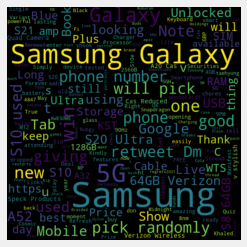

In [230]:
# Plot the  word cloud
allWords=''.join( [twts for twts in df['Tweets']])
wc=WordCloud(width=800, height=800, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [231]:
# Creat a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Bobeite Long USB C Cable 3M,2Pack 10ft USB C t...",0.500000,0.075000,Positive
1,Get ready for some epic 💜. Check out fresh po...,0.425000,0.400000,Positive
2,So is it good??,0.600000,0.700000,Positive
3,"In my case, my phone restarts on its own the ...",0.641667,0.237500,Positive
4,And certainly not this one,0.571429,-0.107143,Negative
...,...,...,...,...
95,Samsung SGH-A847 Rubgy 2 Rugged GSM Unlocked A...,0.000000,0.000000,Neutral
96,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless...",0.433333,-0.166667,Negative
97,*Galaxy M31 at 14999*\n\nWas selling at 16499 ...,0.500000,0.000000,Neutral
98,"Samsung Galaxy S8, 5.8"" 64GB (Verizon Wireless...",0.433333,-0.166667,Negative


In [232]:
# Print all positive tweets
j=1
for i in range(0, df.shape[0]):
    if(df['Analysis'][i]== "Positive"):
        print(str(j)+')'+df['Tweets'][i]+'\n')
        j=j+1
ptweets=j-1;

1)Bobeite Long USB C Cable 3M,2Pack 10ft USB C to USB A Charger Cables,Nylon Braided USB Type C Fast Charging Cable L… 

2)Get ready for some epic 💜. Check out fresh  portraits in the thread find the  that best fits…

3) So is it good??

4) In my case, my phone restarts on its own the moment the load is heavy (like opening twitter). Not bad for a 4.5yo samsung s7 hahaha

5)Eid Mubarak! Open SnackVideo Join  to win Samsung S21 other big prizes!  

6) Thank u so much ❤️
Wish to win 🙏🤞

     … 

7)Good thing we have our  its loooong lasting battery life to play mobile games during breaks! 
Get your Gala…

8)[📢]
 Solar will be attending Samsung's  Galaxy Book Live Quiz Show 

📅 May 14 
⏰ 9PM KST 

Live Stream Links:
🔗https:/…

9)giving out 1 Samsung S10 used by me to win  all you have to do is retweet Dm your phone number i will pick randomly…

10)giving out 1 Samsung S10 used by me to win  all you have to do is retweet Dm your phone number i will pick randomly…

11)Want to get your hands 

In [233]:
# Print all negative tweets
j=1
for i in range(0, df.shape[0]):
    if(df['Analysis'][i]== "Negative"):
        print(str(j)+')'+df['Tweets'][i]+'\n')
        j=j+1
ntweets=j-1;

1) And certainly not this one

2)   My regrets

3)Thank you HOM. One Samsung no go bad sha. To start the year with blessings. 

4) Right? So mad at myself. I've dropped it plenty of times before but never on hard tile before, I gues… 

5) Yes, it's a long story

6)[FINALS] Birthday June
 

20💙❤️x50 votes a day 
Prize: Wide AD Samsung station
Ends: 05.20 18pm kst

🖇 

7)Samsung Galaxy A71 5G Unlocked , 6.7" AMOLED Screen,128GB of Storage, Long Lasting Battery, Single SIM, 2020 Model,… 

8)Samsung Galaxy S8, 5.8" 64GB (Verizon Wireless) - Midnight Black (Renewed)

Samsung Galaxy S8, 5.8" 64GB (Verizon W… 

9)Samsung Galaxy S8, 5.8" 64GB (Verizon Wireless) - Midnight Black

Samsung Galaxy S8, 5.8" 64GB (Verizon Wireless) -… 



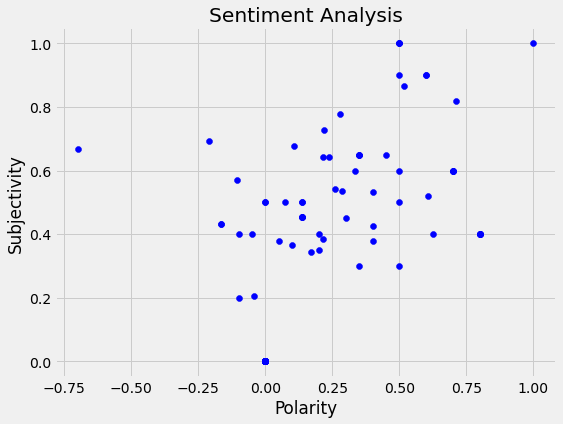

In [234]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [235]:
# Get the percentage of positive tweets
print('Percentage of Positive tweets:')
round((ptweets/df.shape[0])*100,1)

Percentage of Positive tweets:


54.0

In [236]:
# Get the percentage of negative tweets
print('Percentage of Negative tweets:')
round((ntweets/df.shape[0])*100,1)

Percentage of Negative tweets:


9.0

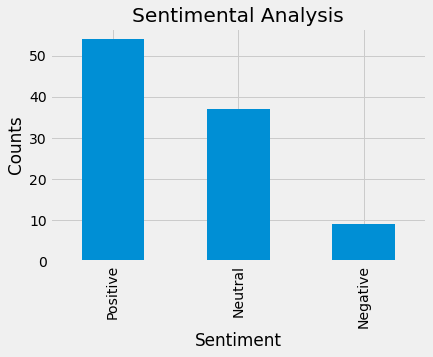

In [237]:
# Plot and visualize the counts of sentimental analysis
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()